## Black-Scholes model 

In [18]:
import numpy as np
from scipy.stats import norm

N = norm.cdf

def BS_CALL(S, K, T, r, sigma):
    d1 = (np.log(S/K) + (r+sigma**2/2)*T)/sigma*np.sqrt(T) #modeling
    d2 = d1 - sigma*np.sqrt(T)
    return S * N(d1) - K*np.exp(-r*T) * N(d2) # write it manully

def BS_PUT(S, K, T, r, sigma):
    d1 = (np.log(S/K) + (r+sigma**2/2)*T)/sigma*np.sqrt(T)
    d2 = d1 - sigma*np.sqrt(T)
    return K*np.exp(-r*T) * N(-d2) - S * N(-d1)

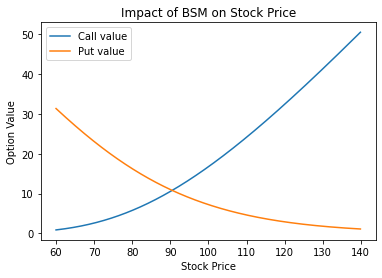

In [19]:
import matplotlib.pyplot as plt
K = 100
r = 0.1
T = 1
sigma = 0.3

S = np.arange(60,140,0.1) # array range

calls = [BS_CALL(s, K, T, r, sigma) for s in S] # Array of series of optin value
puts = [BS_PUT(s, K, T, r, sigma) for s in S]

plt.plot(S, calls, label = 'Call value')
plt.plot(S, puts, label = 'Put value')
plt.xlabel('Stock Price')
plt.ylabel('Option Value')
plt.title('Impact of BSM on Stock Price')
plt.legend()


## Balck Scholes with dividend

In [20]:
#  BSM  Model with dividend

import numpy as np
from scipy.stats import norm

N = norm.cdf

def BS_CALL_D(S, K, T, r, q, sigma):
    d1 = (np.log(S/K) + (r-q + sigma**2/2)*T)/sigma*np.sqrt(T) #modeling
    d2 = d1 - sigma*np.sqrt(T)
    return S * np.exp(-q*T) * N(d1) - K*np.exp(-r*T) * N(d2) # write it manually

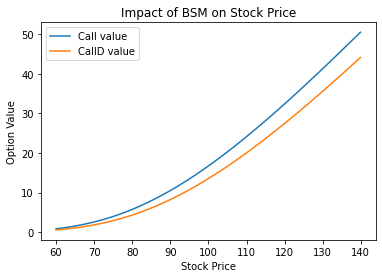

In [29]:
import matplotlib.pyplot as plt
K = 100
r = 0.1
q = 0.05 # annulised dividend - stock price is expected to drop as compared to another stock without devidend
T = 1
sigma = 0.3

S = np.arange(60,140,0.1) # array range

calls = [BS_CALL(s, K, T, r, sigma) for s in S] # Array of series of optin value
callsD = [BS_CALL_D(s, K, T, r, q, sigma) for s in S]

plt.plot(S, calls, label = 'Call value')
plt.plot(S, callsD, label = 'CallD value')
plt.xlabel('Stock Price')
plt.ylabel('Option Value')
plt.title('Impact of BSM on Stock Price')
plt.legend()

## Check model robustness - the impact of market variable parameters

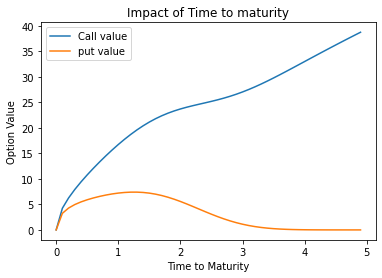

In [22]:
# change T, hodling others certain

import matplotlib.pyplot as plt
K = 100
r = 0.1
S = 100
sigma = 0.3

T = np.arange(0,5,0.1) # array range

calls = [BS_CALL(S, K, t, r, sigma) for t in T] # Array of series of optin value
puts = [BS_PUT(S, K, t, r, sigma) for t in T]

plt.plot(T, calls, label = 'Call value')
plt.plot(T, puts, label = 'put value')
plt.xlabel('Time to Maturity')
plt.ylabel('Option Value')
plt.title('Impact of Time to maturity')
plt.legend()

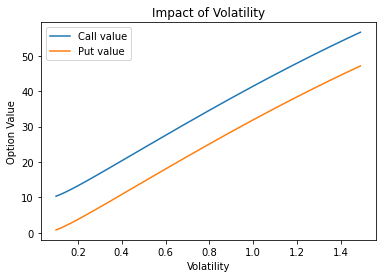

In [23]:
# change sigma, hodling others certain

import matplotlib.pyplot as plt
K = 100
r = 0.1
S = 100
T = 1

Sig = np.arange(0.1,1.5,0.01) # array range

calls = [BS_CALL(S, K, T, r, sig) for sig in Sig] # Array of series of optin value
puts = [BS_PUT(S, K, T, r, sig) for sig in Sig]

plt.plot(Sig, calls, label = 'Call value')
plt.plot(Sig, puts, label = 'Put value')
plt.xlabel('Volatility')
plt.ylabel('Option Value')
plt.title('Impact of Volatility')
plt.legend()

In [24]:
# measure the sensitivity of the call option to the underlying asset --> opdelta

K = 100
S = 100
r - 0.1
sigma = 0.3
def opDelta(q, T):
    d1 = ((np.log(S/K))+((r-q)+sigma**2/2)*T) / (sigma*np.sqrt(T)) #BSM Dividend
    return np.exp(-q*T) * d1 *100


In [25]:
opDelta(0.05, 1)
# The larger the dividend, the samller the option delta, 
# which shows more stable and less sensible the stock is 
# Because you can only pay dividend when stock is stable,
# then pay more dividend reflect less stock volatility, vice versa

30.122265109189282

## Put - Call Parity

In [26]:
import numpy as np
from scipy.stats import norm

N = norm.cdf

def BS_CALL_PCP(S, K , T , r , sigma):
    d1 = (np.log(S/K) + (r + sigma**2/2)*T) / sigma * np.sqrt(T) # Modelling
    d2 = d1 - sigma * np.sqrt(T)
    return S * N(d1) - K * np.exp(-r*T) * N(d2) # Write it manually

def BS_PUT_PCP(S, K , T , r , sigma):
    d1 = (np.log(S/K) + (r + sigma**2/2)*T) / sigma * np.sqrt(T)
    d2 = d1 - sigma * np.sqrt(T)
    return (S * N(d1) - K * np.exp(-r*T) * N(d2)) + K * np.exp(-r*T) - S

In [27]:
BS_PUT_PCP(100,100,1,0.1,0.3)

7.217875385982609

In [28]:
BS_PUT(100,100,1,0.1,0.3)

7.217875385982609